In [128]:
pip install arch

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta

In [130]:
from google.colab import files
import pandas as pd

# Unggah file
uploaded = files.upload()

Saving Laporan Return Perusahaan.xlsx to Laporan Return Perusahaan (2).xlsx


In [131]:
df = pd.read_excel(next(iter(uploaded)), sheet_name = 'data training')
df.tail()

,Date,Closing
148,2024-09-24,115
149,2024-09-25,121
150,2024-09-26,121
151,2024-09-27,122
152,2024-09-30,121


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     153 non-null    datetime64[ns]
 1   Closing  153 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [ ]:
df.isna().sum()

,0
Date,0
Closing,0


In [137]:
df.fillna(0, inplace=True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [140]:
returns = 100*(df['Closing'].pct_change()).dropna()
returns.index = df['Date'][1:]
returns

,Closing
Date,
2024-02-02,-2.116402
2024-02-05,-2.702703
2024-02-06,-0.555556
2024-02-07,-1.117318
2024-02-12,-0.564972
...,...
2024-09-24,-0.862069
2024-09-25,5.217391
2024-09-26,0.000000


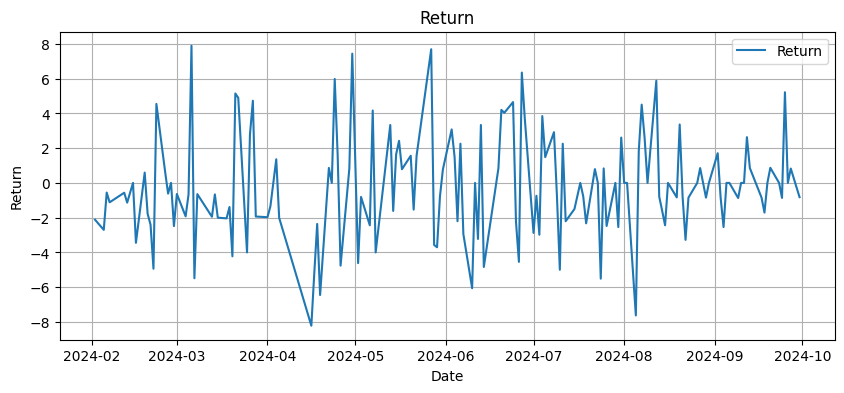

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(returns, label='Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Return')
plt.grid(True)
plt.legend()
plt.show()

# PACF

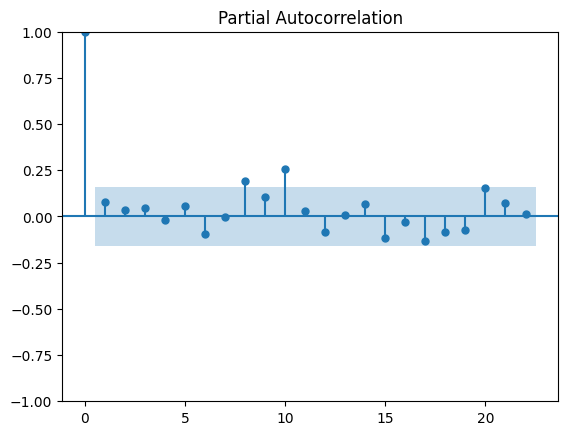

In [141]:
plot_pacf(returns**2)
plt.show()

# GARCH Model

In [142]:
model = arch_model(returns, p=1, q=1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 697.8636051636408
Iteration:      2,   Func. Count:     14,   Neg. LLF: 988.2009329572356
Iteration:      3,   Func. Count:     21,   Neg. LLF: 383.62770679741357
Iteration:      4,   Func. Count:     27,   Neg. LLF: 429.608975750221
Iteration:      5,   Func. Count:     34,   Neg. LLF: 379.65481976026246
Iteration:      6,   Func. Count:     39,   Neg. LLF: 379.6529308036447
Iteration:      7,   Func. Count:     44,   Neg. LLF: 379.6526907389173
Iteration:      8,   Func. Count:     49,   Neg. LLF: 379.65268936843296
Iteration:      9,   Func. Count:     53,   Neg. LLF: 379.6526893686977
Optimization terminated successfully    (Exit mode 0)
            Current function value: 379.65268936843296
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


In [143]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Closing   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -379.653
Distribution:                  Normal   AIC:                           767.305
Method:            Maximum Likelihood   BIC:                           779.401
                                        No. Observations:                  152
Date:                Tue, Nov 19 2024   Df Residuals:                      151
Time:                        06:51:02   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2025      0.234     -0.865      0.387 [ -0.662,  0.256]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3314      0.428      0.774      0.439    [ -0.508,  1.171]
alpha[1]       0.0498  2.795e-02      1.783  7.455e-02 [-4.940e-03,  0.105]
beta[1]        0.9131  4.130e-02     22.108 2.626e-108    [  0.832,  0.994]
===========================================================================

Covariance estimator: robust
"""

In [144]:
rolling_predictions = []
test_size = 151

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.10/dist-packages/arch/univariate/volatility.py:1215: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:449: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:449: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:449: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:449: RuntimeWarning: invalid value encountered in add
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
/usr/local/lib/python3.1

In [145]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-151:])
rolling_predictions

,0
Date,
2024-02-05,0.000000
2024-02-06,0.293150
2024-02-07,1.077454
2024-02-12,0.857465
2024-02-13,0.745589
...,...
2024-09-24,1.965424
2024-09-25,1.751031
2024-09-26,2.652025


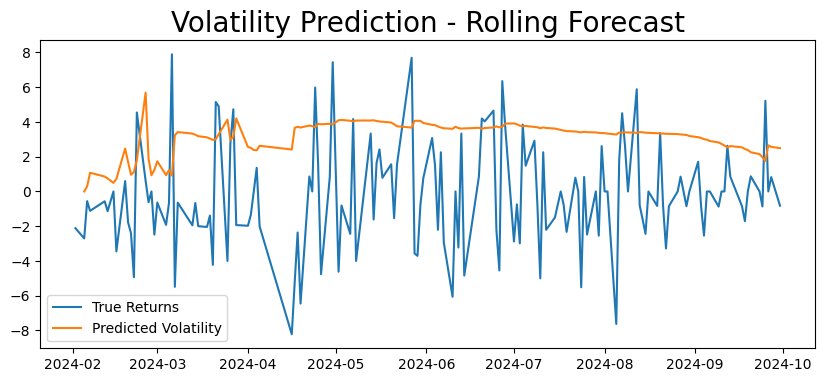

In [146]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns)
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'])

In [147]:
train = returns
model = arch_model(train, p=1, q=2)
model_fit = model.fit(disp='off')

In [151]:
# Pastikan kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Forecast selama 7 hari ke depan
pred = model_fit.forecast(horizon=7)

# Ambil tanggal terakhir dan buat future dates
last_date = df['Date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 8)]

# Buat series prediksi dengan future dates sebagai index
pred = pd.Series(np.sqrt(pred.variance.values[-1, :]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 31 Days')

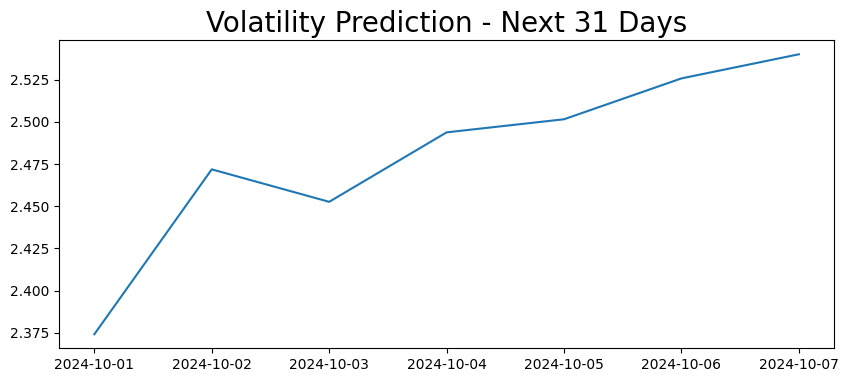

In [152]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 31 Days', fontsize=20)